In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
with open("top10_df.pkl",'rb') as fp:
    df = pickle.load(fp)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the data
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Importing the model (this is the line in the model you would change for each model)
from sklearn.ensemble import AdaBoostClassifier

# Instantiating the model (also change this line)
clf = AdaBoostClassifier()

# Fitting the model
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

              precision    recall  f1-score   support

        Sell       0.37      0.04      0.07      2633
         Buy       0.47      0.35      0.40      5075
        Hold       0.47      0.75      0.57      6184

    accuracy                           0.47     13892
   macro avg       0.43      0.38      0.35     13892
weighted avg       0.45      0.47      0.41     13892



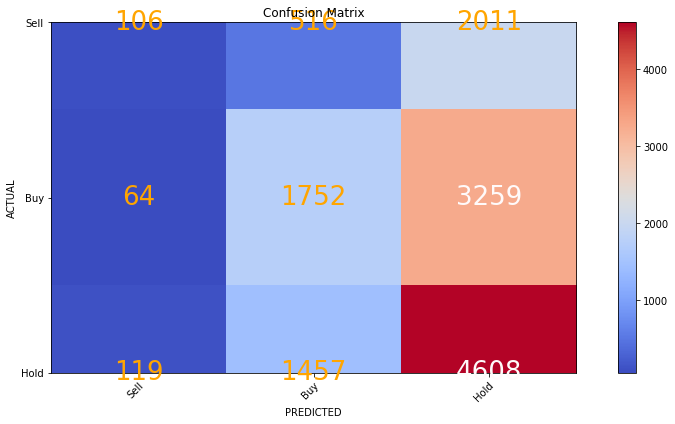

In [6]:
### Printing out evaluation metrics
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

### Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax
  
### Running the Confusion Matrix
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [7]:
# Importing GridSearch 
from sklearn.model_selection import GridSearchCV

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, n_estimators=50, score=(train=0.353, test=0.348), total=   2.7s
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  learning_rate=1, n_estimators=50, score=(train=0.352, test=0.340), total=   2.9s
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV]  learning_rate=1, n_estimators=50, score=(train=0.347, test=0.339), total=   2.8s
[CV] learning_rate=1, n_estimators=100 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s


[CV]  learning_rate=1, n_estimators=100, score=(train=0.361, test=0.354), total=   5.3s
[CV] learning_rate=1, n_estimators=100 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s remaining:    0.0s


[CV]  learning_rate=1, n_estimators=100, score=(train=0.361, test=0.346), total=   5.4s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV]  learning_rate=1, n_estimators=100, score=(train=0.353, test=0.349), total=   5.4s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV]  learning_rate=1, n_estimators=200, score=(train=0.364, test=0.352), total=  10.6s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV]  learning_rate=1, n_estimators=200, score=(train=0.365, test=0.345), total=  10.4s
[CV] learning_rate=1, n_estimators=200 ...............................
[CV]  learning_rate=1, n_estimators=200, score=(train=0.358, test=0.345), total=  10.6s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV]  learning_rate=1, n_estimators=500, score=(train=0.372, test=0.352), total=  27.1s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV]  learning_rate=1, n_estimators=500, score

C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.1, n_estimators=50, score=(train=0.311, test=0.308), total=   2.7s
[CV] learning_rate=0.1, n_estimators=50 ..............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.1, n_estimators=50, score=(train=0.306, test=0.307), total=   2.6s
[CV] learning_rate=0.1, n_estimators=50 ..............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.1, n_estimators=50, score=(train=0.308, test=0.307), total=   2.7s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=(train=0.322, test=0.319), total=   5.6s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=(train=0.321, test=0.319), total=   5.2s
[CV] learning_rate=0.1, n_estimators=100 .............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.1, n_estimators=100, score=(train=0.318, test=0.316), total=   5.2s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.332, test=0.326), total=  11.1s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.330, test=0.328), total=  10.6s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.328, test=0.325), total=  11.1s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV]  learning_rate=0.1, n_estimators=500, score=(train=0.341, test=0.335), total=  28.0s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV]  learning_rate=0.1, n_estimators=500, score=(train=0.345, test=0.335), total=  29.9s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV]  learning_rate=0.1, n_estimat

C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=50, score=(train=0.203, test=0.203), total=   2.7s
[CV] learning_rate=0.01, n_estimators=50 .............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=50, score=(train=0.203, test=0.203), total=   2.6s
[CV] learning_rate=0.01, n_estimators=50 .............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=50, score=(train=0.203, test=0.203), total=   2.6s
[CV] learning_rate=0.01, n_estimators=100 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=100, score=(train=0.292, test=0.291), total=   5.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=100, score=(train=0.296, test=0.295), total=   5.2s
[CV] learning_rate=0.01, n_estimators=100 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=100, score=(train=0.203, test=0.203), total=   5.3s
[CV] learning_rate=0.01, n_estimators=200 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=200, score=(train=0.299, test=0.299), total=  10.7s
[CV] learning_rate=0.01, n_estimators=200 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=200, score=(train=0.298, test=0.298), total=  10.6s
[CV] learning_rate=0.01, n_estimators=200 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=200, score=(train=0.303, test=0.302), total=  10.5s
[CV] learning_rate=0.01, n_estimators=500 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=500, score=(train=0.311, test=0.309), total=  26.3s
[CV] learning_rate=0.01, n_estimators=500 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, n_estimators=500, score=(train=0.304, test=0.305), total=  26.9s
[CV] learning_rate=0.01, n_estimators=500 ............................


C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex Willett\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  7.7min finished


[CV]  learning_rate=0.01, n_estimators=500, score=(train=0.308, test=0.308), total=  26.3s
Mean Training Score: 0.3181154471973253
Mean Testing Score 0.35297325047491784

Best Parameter Found:
              precision    recall  f1-score   support

        Sell       0.34      0.05      0.09      2633
         Buy       0.47      0.34      0.39      5075
        Hold       0.47      0.74      0.57      6184

    accuracy                           0.46     13892
   macro avg       0.42      0.38      0.35     13892
weighted avg       0.44      0.46      0.41     13892



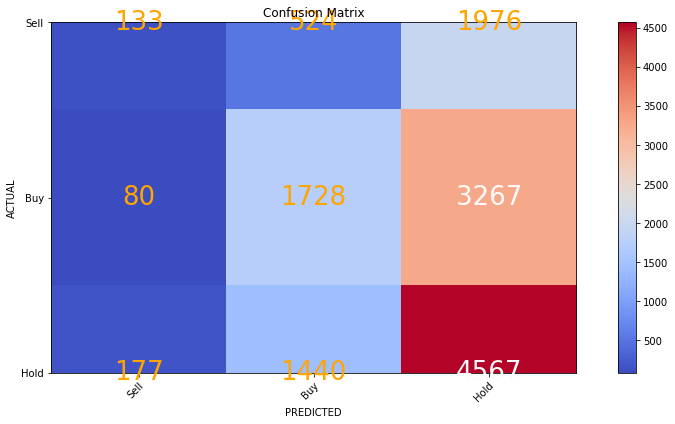

In [8]:
# Parameters to Tune (this would need to be modified for each different model)
params = {'n_estimators': [50, 100, 200, 500],
         'learning_rate': [1, .1, .01]}

# Instantiating GridSearch with the parameters set above
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

# Fitting the model to our dataset
search.fit(X,y)

# Printing out the evaluations for our model which is different than the classification reports
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score", search.score(X,y))
print("\nBest Parameter Found:")
search.best_params_

# Using the model with the best parameters and fitting it to the training sets to finally test it
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

# Classifier predictions from the tuned model
s_pred = search_clf.predict(X_test)

# Printing out results from the tuned model
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

# The confusion matrix for the tuned model
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
plt.show();

Classifying the New Data

In [14]:
# Importing the library
from joblib import dump
# Saving the classification model as a file named 'xgboost.joblib'
dump(clf, 'xgboost.joblib')

['xgboost.joblib']

In [12]:
# Importing the necessary libraries and model
import matplotlib.pyplot as plt
from matplotlib import rcParams
import _pickle as pickle
import numpy as np
import pandas as pd
from joblib import load
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [16]:
# Loading Pretrained XGBoost Model we made for our numerous trials
clf = load('xgboost.joblib')

In [20]:
# Loading in the Data
# Using the Stockpup dataset to find the latest QR
with open('stock_pickle_full.pickle', 'rb') as fp:
    stock_df = pickle.load(fp)
    
# Using the top 10 features to scale with latest QR
with open("top10_df.pkl", "rb") as fp:
    top10_df = pickle.load(fp)  

In [21]:
top10_df

,P/B ratio,Assets,Shares split adjusted,Shares,P/E ratio,Asset turnover,Current Assets,Cash at end of period,Liabilities,Revenue,Decision
0,0.000000,3.011116,0.060170,0.060170,0.000000,0.000000,1.505420,-28.508772,2.212896,10.641140,0.0
1,-40.465919,6.911624,0.164196,0.164196,0.000000,0.000000,5.675302,-28.118609,9.182531,7.444668,0.0
2,-31.739130,7.640220,0.739888,0.739888,0.000000,0.000000,5.819611,41.678521,8.034188,26.292135,2.0
3,-2.335456,9.293769,0.088384,0.088384,0.000000,0.000000,-3.430592,-56.526104,16.044304,-15.747331,0.0
4,-28.260870,-1.390096,0.066338,0.066338,-25.917859,-6.474820,-8.478301,86.836028,-5.535860,-16.156283,2.0
...,...,...,...,...,...,...,...,...,...,...,...
55561,-6.218487,-7.558140,-0.417521,-0.417521,1.553672,1.587302,-13.833265,-21.049975,-6.452057,8.389013,1.0
55562,27.598566,1.211274,-0.286092,-0.286092,23.922114,-1.562500,1.185677,5.754476,-1.250000,-6.438356,1.0
55563,-3.885768,-1.001151,-0.421944,-0.421944,-6.240180,1.587302,-0.656199,-5.804111,-1.399851,3.587116,1.0
55564,5.358013,21.573870,-0.284943,-0.284943,-7.110366,-1.562500,-3.845247,-17.458280,25.977949,4.593640,2.0


In [25]:
def format_qr(df, df2):
    """
    Formats the DF from the Stockpup dataset so that the values and columns line up with training and testing data
    Uses the second DF of our data to find the appropriate feature columns to use and will be appended to
    Scales the DF with the new data
    Returns the QR with the new scaled data
    """
    # Dropping the class column as it is not needed
    df2 = df2.drop("Decision", axis=1)
    
    # Setting the Datetime index
    df['Quarter end'] = pd.to_datetime(df['Quarter end'])
    df = df.set_index("Quarter end")
    
    # Sort the DF based on date
    df = df.sort_index(ascending=False)
    
    # Finding the latest values
    df = df.head(2)
    
    # Replacing 'None' with 0
    df = df.replace("None", 0)
    
    # Converting all values to numeric
    df = df.apply(pd.to_numeric)
    
    # Finding the percent change
    df = df.pct_change(-1).apply(lambda x: x*100)
    
    # Using only the latest QR
    df = df.head(1)
    
    # Replacing values with 0
    df = df.replace([np.inf, -np.inf], [1,-1]).fillna(0)
    
    # Using only the columns with the data that we have (excluding the class labels)
    df = df[df2.columns]
    
    # Appending the new data to rest of the data for scaling purposes
    df = df2.append(df)
    
    # Scaling the data
    scaler = StandardScaler()
    
    df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    
    # Finding the latest scaled QR
    df = df.tail(1)
    
    # Returning the latest scaled QR with the appropriate features
    return df

def prediction(pred):
    """
    Returns the class label for the prediction
    """
    print('The Classifier has determined this stock to be a...')
    if pred == 1.0:
        print('BUY')
    elif pred == 0.0:
        print('SELL')
    else:
        print('HOLD')
        
    
def pie_stock(pred, name):
    """
    Creates a pie chart of the stock class predictions
    """
    rcParams['font.size'] = 30.0
    plt.style.use('bmh')
    plt.figure(figsize=(10,10))
    plt.pie(pred[0], 
            labels=['SELL', 'BUY','HOLD'], 
            shadow=True,
            explode=(.05,.05,.05),
            autopct='%1.1f%%')
    plt.title(name)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

The Classifier has determined this stock to be a...
HOLD


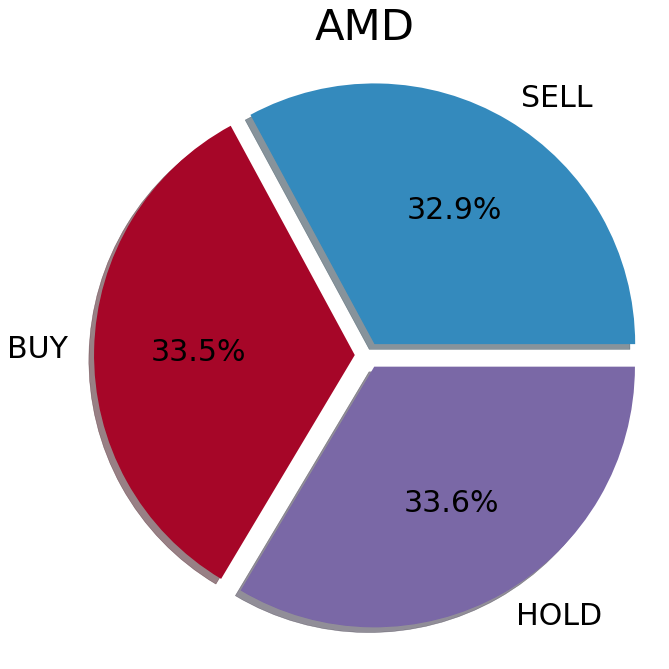

In [26]:
# Viewing the DF with the latest scaled QR
qr_df = format_qr(stock_df['AMD'], top10_df)
qr_df

# Predicting the class for our latest QR
class_label = clf.predict(qr_df)[0]
prediction(class_label)

# Visualizing the Prediction probabilities for our latest QR
pie_stock(clf.predict_proba(qr_df), "AMD")